In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df = pd.read_csv('/content/hotels_data (1).csv')

In [11]:
df

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4
...,...,...,...,...,...,...,...,...,...,...
187843,99,8/15/2015 0:00,9/4/2015 0:00,5,1995,1935,4,-1,Cassa Hotel 45th Street,4
187844,99,8/15/2015 0:00,9/4/2015 0:00,5,2105,1865,4,4,The Jade Hotel,4
187845,99,8/15/2015 0:00,8/20/2015 0:00,5,1456,1397,4,8,Hyatt Union Square New York,4
187846,99,8/15/2015 0:00,9/2/2015 0:00,5,1705,1648,4,2,Hyatt Union Square New York,4


from matplotlib import pyplot as plt
df['Snapshot ID'].plot(kind='hist', bins=20, title='Snapshot ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Original Price'].plot(kind='hist', bins=20, title='Original Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Discount Price'].plot(kind='hist', bins=20, title='Discount Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Discount Code'].plot(kind='hist', bins=20, title='Discount Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Snapshot ID', y='Original Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Original Price', y='Discount Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Discount Price', y='Discount Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Discount Code', y='Available Rooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Snapshot Date']
  ys = series['Snapshot ID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Snapshot Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Snapshot Date')
_ = plt.ylabel('Snapshot ID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Snapshot Date']
  ys = series['Original Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Snapshot Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Snapshot Date')
_ = plt.ylabel('Original Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Snapshot Date']
  ys = series['Discount Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Snapshot Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Snapshot Date')
_ = plt.ylabel('Discount Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Snapshot Date']
  ys = series['Discount Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Snapshot Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Snapshot Date')
_ = plt.ylabel('Discount Code')

from matplotlib import pyplot as plt
df['Snapshot ID'].plot(kind='line', figsize=(8, 4), title='Snapshot ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Original Price'].plot(kind='line', figsize=(8, 4), title='Original Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Discount Price'].plot(kind='line', figsize=(8, 4), title='Discount Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Discount Code'].plot(kind='line', figsize=(8, 4), title='Discount Code')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187848 entries, 0 to 187847
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Snapshot ID      187848 non-null  int64         
 1   Snapshot Date    187848 non-null  datetime64[ns]
 2   Checkin Date     187848 non-null  datetime64[ns]
 3   Days             187848 non-null  int64         
 4   Original Price   187848 non-null  int64         
 5   Discount Price   187848 non-null  int64         
 6   Discount Code    187848 non-null  int64         
 7   Available Rooms  187848 non-null  int64         
 8   Hotel Name       187848 non-null  object        
 9   Hotel Stars      187848 non-null  int64         
dtypes: datetime64[ns](2), int64(7), object(1)
memory usage: 14.3+ MB


In [14]:
df.describe()

,Snapshot ID,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Stars
count,187848.000000,187848.0,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000
mean,351.643451,5.0,1825.742143,1673.172283,2.434186,14.588561,3.905823
std,1007.348927,0.0,1042.355712,983.618013,1.005191,41.575482,0.846496
min,1.000000,5.0,289.000000,260.000000,1.000000,-1.000000,0.000000
25%,150.000000,5.0,1160.000000,1035.000000,2.000000,-1.000000,3.000000
50%,439.000000,5.0,1599.000000,1475.000000,2.000000,-1.000000,4.000000
75%,506.000000,5.0,2160.000000,1963.250000,3.000000,8.000000,4.000000
max,417419.000000,5.0,29975.000000,28675.000000,4.000000,431.000000,5.000000


In [28]:
df.duplicated().drop_duplicates(inplace=True)

Changing Dtypes

In [8]:
df['Snapshot Date'] = pd.to_datetime(df['Snapshot Date'], errors='coerce')
df['Checkin Date'] = pd.to_datetime(df['Checkin Date'], errors='coerce')
df['Original Price'] = pd.to_numeric(df['Original Price'], errors='coerce')
df['Discount Price'] = pd.to_numeric(df['Discount Price'], errors='coerce')
df['Available Rooms'] = pd.to_numeric(df['Available Rooms'], errors='coerce')
df['Days'] = pd.to_numeric(df['Days'], errors='coerce')

Disount Percent

In [15]:
df['discount_pct'] = (df['Original Price'] - df['Discount Price'])/df['Original Price']*100

In [16]:
df['discount_pct']

,discount_pct
0,11.714771
1,11.769991
2,2.974828
3,4.140311
4,3.852789
...,...
187843,3.007519
187844,11.401425
187845,4.052198
187846,3.343109


In [30]:
df.head(5)

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,discount_pct
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,11.714771
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,11.769991
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5,2.974828
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,4.140311
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,3.852789


# EDA

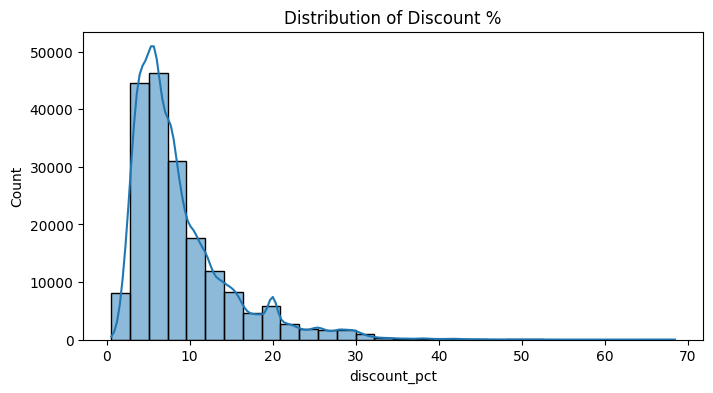

In [91]:
# EDA for Hotel Discount Dataset
plt.figure(figsize=(8,4))
sns.histplot(df['discount_pct'], bins=30, kde=True)
plt.title("Distribution of Discount %")
plt.show()



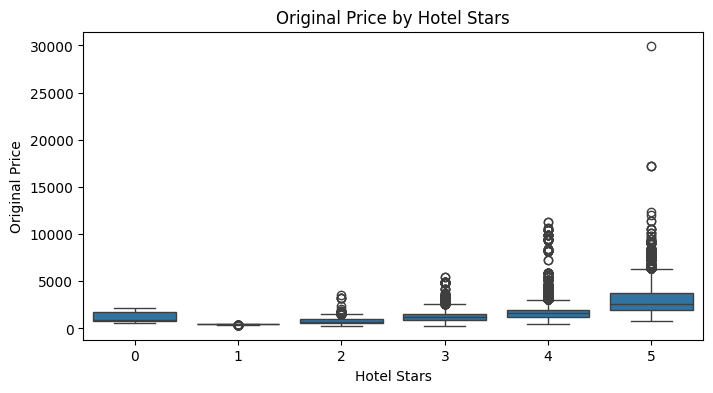

In [92]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Hotel Stars', y='Original Price', data=df)
plt.title("Original Price by Hotel Stars")
plt.show()



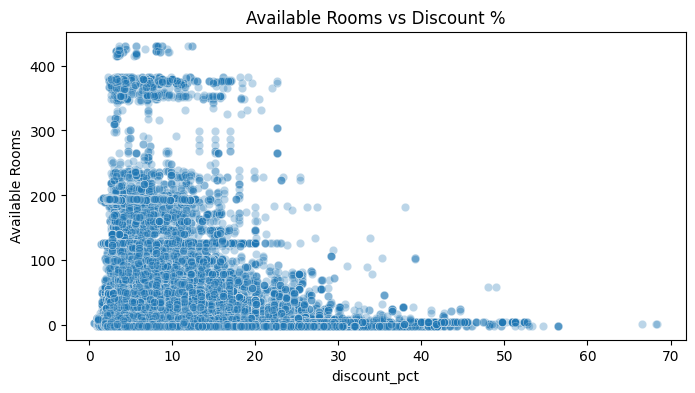

In [93]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='discount_pct', y='Available Rooms', alpha=0.3, data=df)
plt.title("Available Rooms vs Discount %")
plt.show()



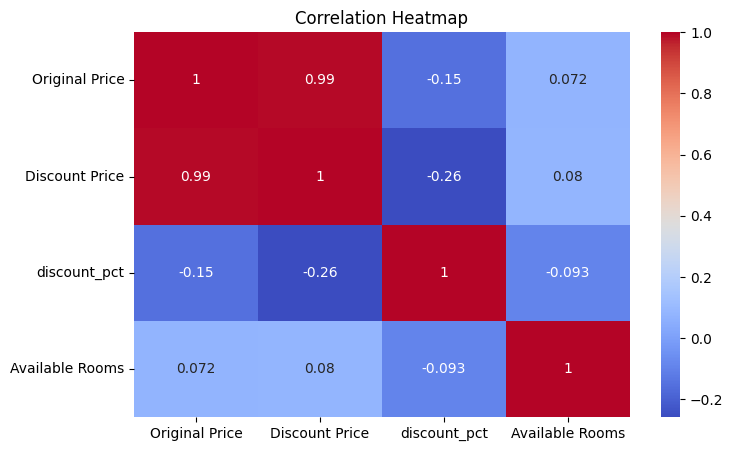

In [94]:
# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df[['Original Price','Discount Price','discount_pct','Available Rooms']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [96]:
baseline = df.groupby(['Hotel Name','Checkin Date'])['Available Rooms'].max().reset_index().rename(columns={'Available Rooms':'avail_max'})

discount = df[df['Discount Code'].notna()].groupby(['Hotel Name','Checkin Date','Discount Code']).agg(
    avg_avail_code=('Available Rooms','mean'),
    avg_discount_pct=('discount_pct','mean'),
    avg_discount_price=('Discount Price','mean'),
    n_snapshots=('Snapshot ID','count')
).reset_index()

merged = pd.merge(discount, baseline, on=['Hotel Name','Checkin Date'], how='left')
merged['rooms_reduction'] = merged['avail_max'] - merged['avg_avail_code']
merged['est_bookings'] = merged['rooms_reduction'].clip(lower=0).astype(int)



# Price Elasticity Modelling

In [99]:
features = ['avg_discount_pct','avg_discount_price','avail_max','n_snapshots']
X = merged[features]
y = merged['est_bookings']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr = LinearRegression().fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Linear Regression  MSE:", mean_squared_error(y_test, y_pred_lr ), "R2:", r2_score(y_test, y_pred_lr))
print("Random Forest  MSE:", mean_squared_error(y_test, y_pred_rf), "R2:", r2_score(y_test, y_pred_rf))

Linear Regression  MSE: 142.77391309483252 R2: 0.31121515578261194
Random Forest  MSE: 132.3917595353417 R2: 0.36130182684951084


# Hotel Segmentation

In [102]:
hotel_agg = df.groupby('Hotel Name').agg(
    avg_price=('Original Price','mean'),
    avg_discount_pct=('discount_pct','mean'),
    pct_discounted=('discount_pct', lambda x: (x>0).mean()),
    median_rooms=('Available Rooms','median'),
    hotel_stars=('Hotel Stars', lambda x: pd.to_numeric(x, errors='coerce').median())
).reset_index()

In [106]:
hotels_df = hotel_agg[['avg_price','avg_discount_pct','pct_discounted','median_rooms','hotel_stars']]
S=StandardScaler()
x_scaled=S.fit_transform(hotels_df)

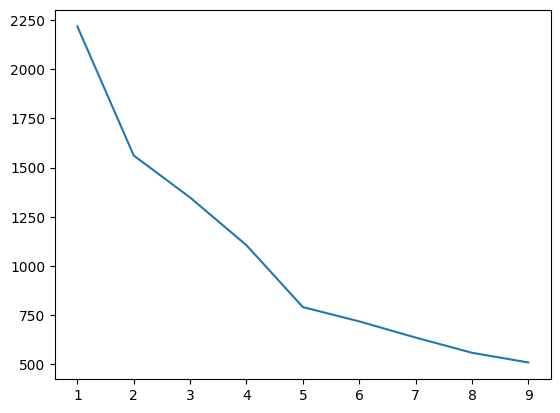

In [107]:
inertia = []
K = range(1, 10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(x_scaled)
    inertia.append(model.inertia_)

plt.plot(K, inertia)

Silhouette Scores from K=2 to 10: [np.float64(0.3202590617734507), np.float64(0.2766574668735955), np.float64(0.3115388415510194), np.float64(0.33626862316141004), np.float64(0.3039738743965229), np.float64(0.3020478700479881), np.float64(0.3139946350877074), np.float64(0.320697164213117)]


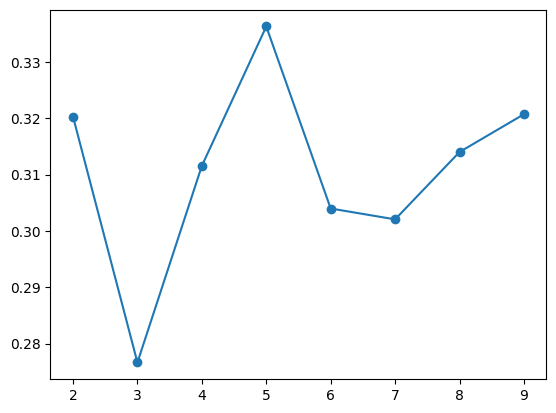

In [108]:
score = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(x_scaled)
    score.append(silhouette_score(x_scaled, labels))

print("Silhouette Scores from K=2 to 10:", score)

plt.plot(range(2, 10), score, marker='o')

Giving Clusters = 5 as showing best silhouatte score for 5

In [110]:
kmeans = KMeans(n_clusters=5, random_state=42)
hotels_df["Cluster"] = kmeans.fit_predict(x_scaled)

In [114]:
Summary = hotels_df.groupby("Cluster").agg({
    'avg_price': ['mean', 'min', 'max'],
    'pct_discounted': ['mean', 'min', 'max'],
    'hotel_stars': ['mean', 'min', 'max']})
print(Summary)

           avg_price                          pct_discounted            \
                mean         min          max           mean  min  max   
Cluster                                                                  
0         996.718283   338.00000  1856.857143            1.0  1.0  1.0   
1        1196.147025   477.00000  2886.000000            1.0  1.0  1.0   
2        1673.163903   548.00000  2700.000000            1.0  1.0  1.0   
3        3682.519020  2456.61194  5421.231884            1.0  1.0  1.0   
4        1526.083600  1000.75000  2357.253675            1.0  1.0  1.0   

        hotel_stars            
               mean  min  max  
Cluster                        
0          2.712121  1.0  4.0  
1          2.898876  0.0  5.0  
2          4.165138  3.0  5.0  
3          4.812500  3.0  5.0  
4          3.941176  3.0  5.0  
